In [166]:
# Required libraries to import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
dataFrame = pd.read_csv("Loan_training.csv")
# dataFrame.head()

In [167]:
# dataFrame.info()

In [168]:
# Numeric value replacement
dataFrame.replace('Male', 1, inplace=True)
dataFrame.replace('Female', 0, inplace=True)
dataFrame.replace('Graduate', 1, inplace=True)
dataFrame.replace('Not Graduate', 0, inplace=True)
dataFrame.replace('No', 0, inplace=True)
dataFrame.replace('Yes', 1, inplace=True)
dataFrame.replace('Y', 1, inplace=True)
dataFrame.replace('N', 0, inplace=True)
dataFrame.replace('3+', 3, inplace=True)
dataFrame.replace('Urban', 0, inplace=True)
dataFrame.replace('Rural', 1, inplace=True)
dataFrame.replace('Semiurban', 2, inplace=True)
MeanValue = np.mean(dataFrame.LoanAmount)
dataFrame.LoanAmount.fillna(MeanValue,inplace = True)
MeanValue = np.mean(dataFrame.ApplicantIncome)
dataFrame.ApplicantIncome.fillna(MeanValue,inplace=True)
MeanValue = np.mean(dataFrame.CoapplicantIncome)
dataFrame.CoapplicantIncome.fillna(MeanValue,inplace=True)
MeanValue = np.mean(dataFrame.Loan_Amount_Term)
dataFrame.Loan_Amount_Term.fillna(MeanValue,inplace=True)
MeanValue = np.mean(dataFrame.Property_Area)
dataFrame.Property_Area.fillna(MeanValue,inplace=True)

# dataFrame.head() # After replacing missing values

In [169]:
# Exp-1 Finding missing values by counting elements in each column
# dataFrame.info()

In [170]:
#Exp- 2Replace the missing values of the columns named ‘LoanAmount’ by considering mean value
MeanValue = np.mean(dataFrame.LoanAmount)
dataFrame.LoanAmount.fillna(MeanValue, inplace=True)
# dataFrame.head()

In [171]:
# EXP-3 missing value pruning by dropping rows
newDataFrame = dataFrame.dropna()
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              511 non-null object
Gender               511 non-null float64
Married              511 non-null float64
Dependents           511 non-null object
Education            511 non-null int64
Self_Employed        511 non-null float64
ApplicantIncome      511 non-null int64
CoapplicantIncome    511 non-null float64
LoanAmount           511 non-null float64
Loan_Amount_Term     511 non-null float64
Credit_History       511 non-null float64
Property_Area        511 non-null int64
Loan_Status          511 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 55.9+ KB


In [172]:
dataFrame.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,614.000000,614.000000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.050489,0.687296
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,84.037468,64.372489,0.364878,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Deleting outlier rows considering 'ApplicantIncome'


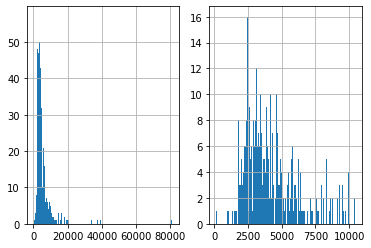

In [173]:
#Exp-4.1 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
print("Deleting outlier rows considering 'ApplicantIncome'")
plt.subplot(1,2,1)
newDataFrame.ApplicantIncome.hist(bins=200)
dataFrameA = newDataFrame[newDataFrame['ApplicantIncome'] <= 10500]
# dataFrameA.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameA.ApplicantIncome.hist(bins=200)
plt.show()

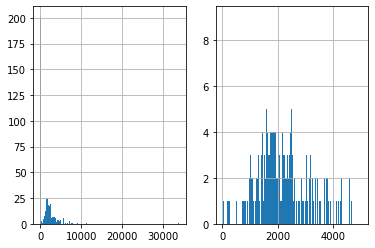

In [174]:
#Exp-4.2 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
# print("Deleting outlier rows considering 'ApplicantIncome' and 'CoapplicantIncome'")
plt.subplot(1,2,1)
dataFrameA.CoapplicantIncome.hist(bins=200)
dataFrameB = dataFrameA[(dataFrameA.CoapplicantIncome <= 5000) & (dataFrameA.CoapplicantIncome > 0)]
# dataFrameB.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameB.CoapplicantIncome.hist(bins=200)
plt.show()

Deleting outlier rows considering 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'


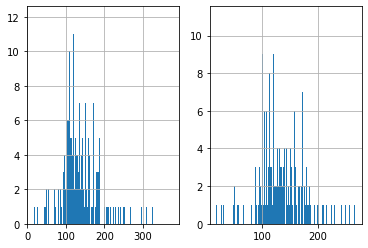

In [175]:
#Exp-4.3 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
print("Deleting outlier rows considering 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'")
plt.subplot(1,2,1)
dataFrameB.LoanAmount.hist(bins=200)
dataFrameC = dataFrameB[dataFrameB['LoanAmount'] <= 270]
dataFrameC = dataFrameC[dataFrameC['LoanAmount']>0]
# dataFrameC.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameC.LoanAmount.hist(bins=200)
plt.show()

In [176]:
# Exp-5.1 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [177]:
# Exp-5.2 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
def outliers_modified_z_score(ys):
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

Applying z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (606, 13)


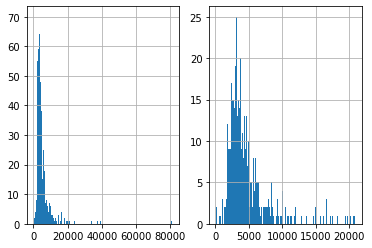

In [178]:
# Exp-5.3 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
print("Applying z-score to our dataset")
k = np.array(outliers_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(1,2,1)
dataFrame.ApplicantIncome.hist(bins=200)
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(1,2,2)
CleandataFrame.ApplicantIncome.hist(bins=200)
plt.show()

Applying z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (606, 13)


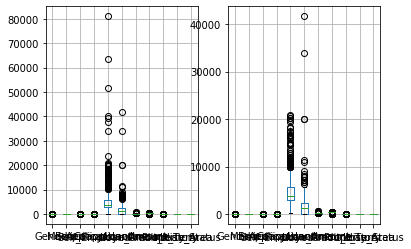

In [179]:
# Exp-5.4 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
print("Applying z-score to our dataset")
k = np.array(outliers_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(1,2,1)
dataFrame.boxplot(return_type='dict')
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(1,2,2)
CleandataFrame.boxplot(return_type='dict')
plt.show()

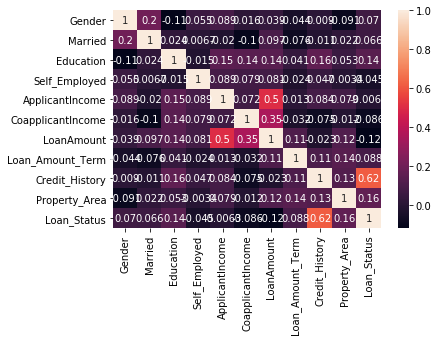

In [180]:
# Exp-6.1 Find the Pearson’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
# Corelations = dataFrame.corr(method='pearson')
Corelations = dataFrameC.corr(method='pearson')
sb.heatmap(Corelations, annot=True)
plt.show()
upper = Corelations.where(np.triu(np.ones(Corelations.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.55
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
droppedDf = dataFrameC.drop(dataFrameC[to_drop], axis=1)
# droppedDf.info()

Visualizing corelations after dropping highly corelated datas


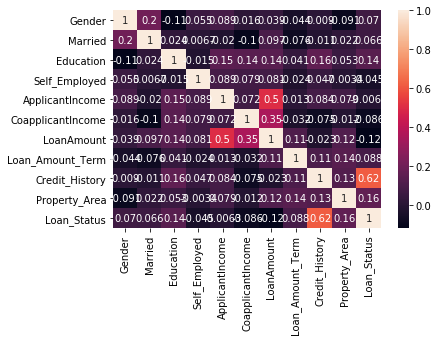

In [181]:
# Exp-6.2 Find the Pearson’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
print("Visualizing corelations after dropping highly corelated datas")
Corelations = droppedDf.corr(method='pearson')
sb.heatmap(Corelations, annot=True)
plt.show()

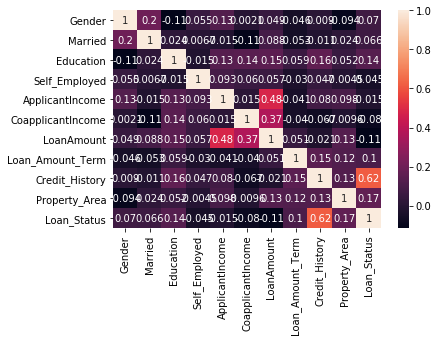

In [182]:
# Exp- 7.1 Find the Spearman’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
SpearManCorrelations = dataFrameC.corr(method='spearman')
sb.heatmap(SpearManCorrelations,annot=True)
plt.show()
upper = Corelations.where(np.triu(np.ones(Corelations.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.55
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
droppedDfS = dataFrameC.drop(CleandataFrame[to_drop], axis=1)
# droppedDfS.info()

Visualizing corelations after dropping highly corelated datas


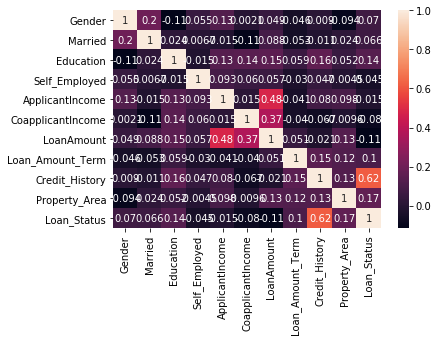

In [183]:
# Exp- 7.2 Find the Spearman’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
print("Visualizing corelations after dropping highly corelated datas")
Corelations = droppedDf.corr(method='spearman')
sb.heatmap(Corelations, annot=True)
plt.show()

Train set: (196, 10) (196,)
Test set: (50, 10) (50,)
Train set Accuracy:  0.8673469387755102
Test set Accuracy:  0.88


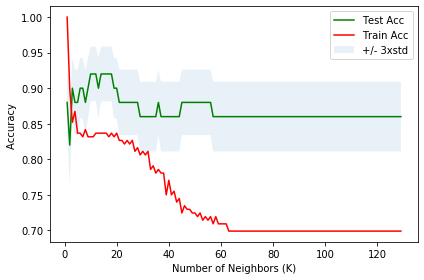

The best accuracy was  0.92 with neighbors k= 10
[[ 4  3]
 [ 1 42]]
Accuracy Score : 0.92
Report : 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.93      0.98      0.95        43

    accuracy                           0.92        50
   macro avg       0.87      0.77      0.81        50
weighted avg       0.91      0.92      0.91        50



In [184]:
# Exp- 8.1 Build k-NN(k-nearest Neighbours) supervised machine learning
# model using Loan_training dataset. Find the accuracy and F1
# Score on Loan_testing dataset.
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
dataFrameC = dataFrameC.dropna()
X = dataFrameC[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = dataFrameC.Loan_Status
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
Ks = 130
mean_acc = np.zeros((Ks-1))
Mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    #Train Model and Predict  Itteratively
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    Yhat = neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    Mean_acc[n-1] = metrics.accuracy_score(y_train, Yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),Mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Test Acc ', 'Train Acc', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with neighbors k=", mean_acc.argmax()+1) 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
k = mean_acc.argmax()+1
#Train Model and Predict  
KNNM = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = KNNM.predict(X_test)
results=confusion_matrix(y_test, yhat_KNN)
print(results)
print ('Accuracy Score :', accuracy_score(y_test, yhat_KNN) )
print ('Report : ')
print (classification_report(y_test, yhat_KNN) )

In [185]:
# required installation for visualization of Decision Tree
# !conda install -c conda-forge pydotplus -y             # Execute this cell for once
# !conda install -c conda-forge python-graphviz -y       # Execute this cell for once
# Pleace ensure that you have proper internet connection 
# this installation requires data files from internet


Shape of X_trainset : (196, 10)
Shape of y_trainset  : (196,)
Shape of X_testset : (50, 10)
Shape of y_testset  : (50,)


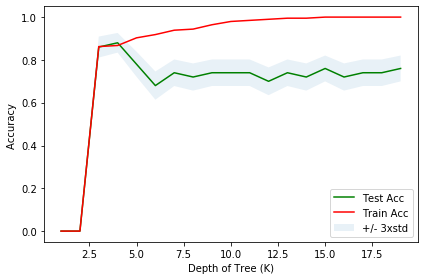

The best accuracy was  0.88 with Depth k= 4
[[ 8  5]
 [ 1 36]]
Accuracy Score : 0.88
Report : 
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.88      0.97      0.92        37

    accuracy                           0.88        50
   macro avg       0.88      0.79      0.83        50
weighted avg       0.88      0.88      0.87        50



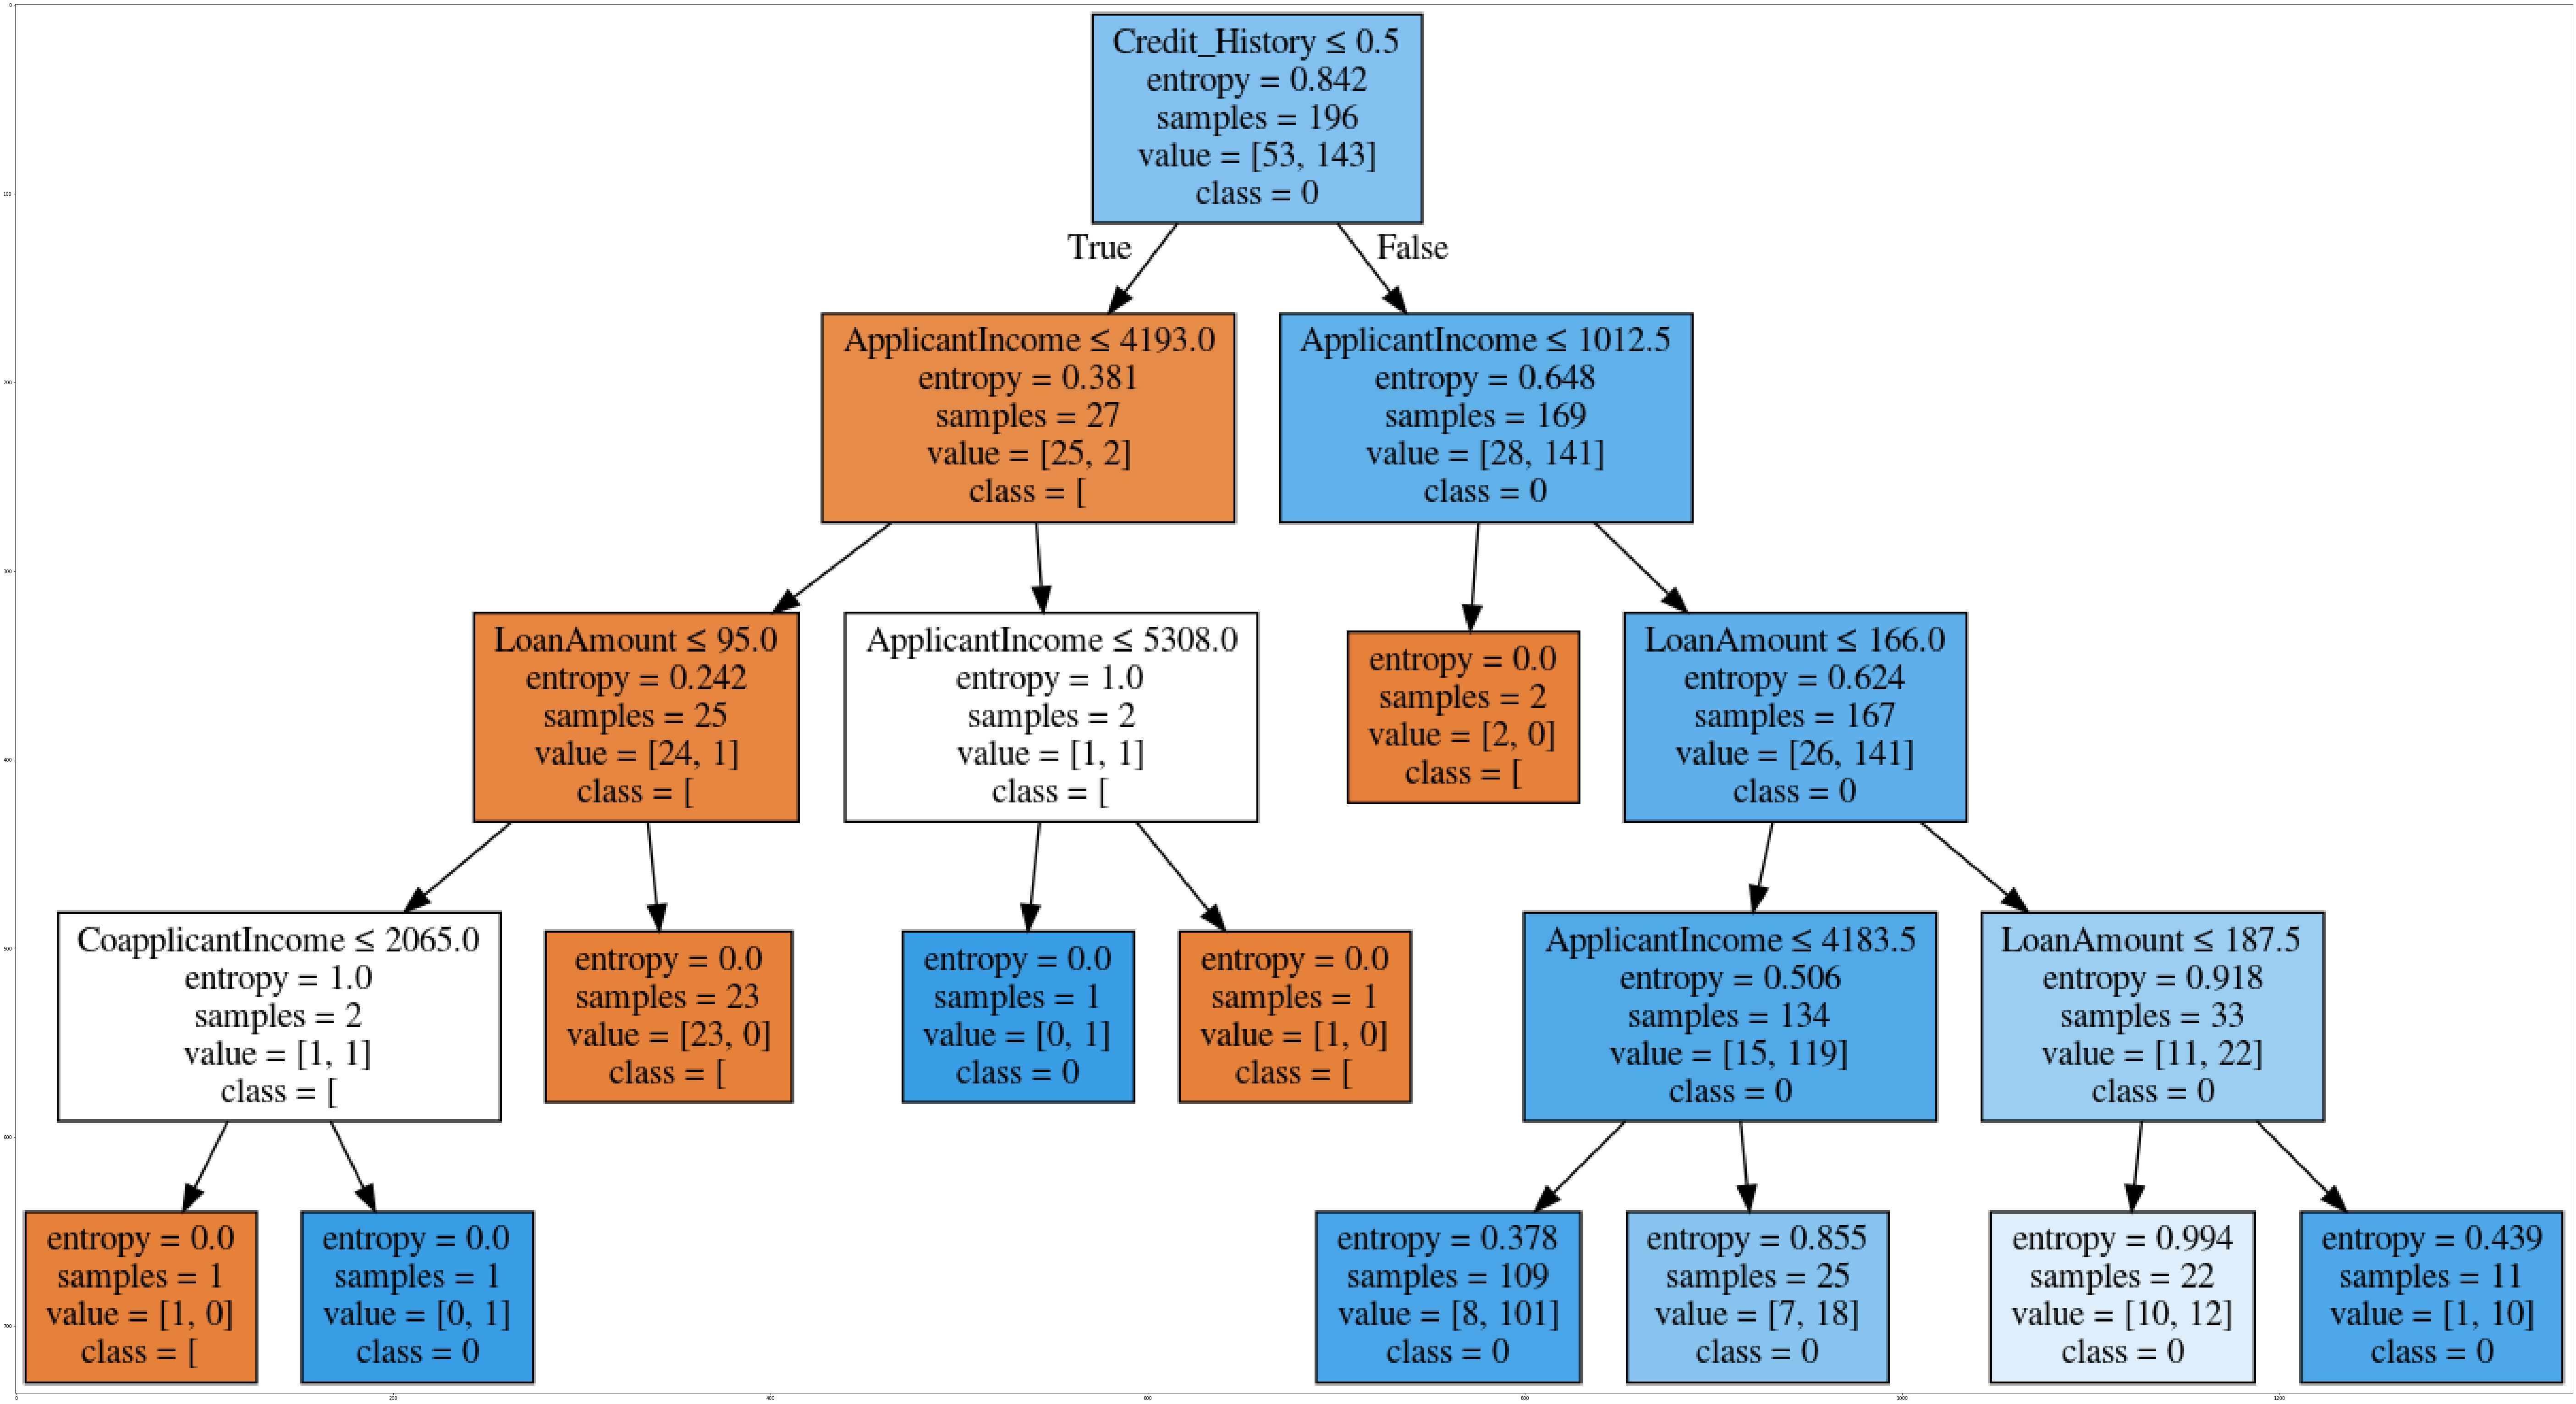

In [186]:
# Exp- 9.1 Build DT (Decision Tree) supervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
CleandataFrame = dataFrameC.dropna()
X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = CleandataFrame.Loan_Status
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)
print("Shape of X_trainset :", X_trainset.shape)
print("Shape of y_trainset  :", y_trainset.shape)
print("Shape of X_testset :", X_testset.shape)
print("Shape of y_testset  :", y_testset.shape)
Ks = 20
mean_acc = np.zeros((Ks-1))
Mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(3,Ks): 
    #Train Model and Predict  Itteratively
    Tree =DecisionTreeClassifier(criterion="entropy", max_depth = n)
    Tree.fit(X_trainset,y_trainset)
    yhat = Tree.predict(X_testset)
    Yhat = Tree.predict(X_trainset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)
    Mean_acc[n-1] = metrics.accuracy_score(y_trainset, Yhat)
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),Mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Test Acc ', 'Train Acc', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth of Tree (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with Depth k=", mean_acc.argmax()+1)
# Modeling .  [ Please Open the EXP_9_Loan_Decision_tree.png image file and observe what is happening here .]
DTM =DecisionTreeClassifier(criterion="entropy", max_depth = mean_acc.argmax()+1)# here max_depth represents the Max tree height
                                                                # change the value of max_depth and watch the 
                                                                # accuracy of the model and think why did this happened
DTM.fit(X_trainset,y_trainset) 
# Prediction
yhat_DT = DTM.predict(X_testset)
# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
results=confusion_matrix(y_testset, yhat_DT)
print(results)
print ('Accuracy Score :', accuracy_score(y_testset, yhat_DT) )
print ('Report : ')
print (classification_report(y_testset, yhat_DT) )
# Visualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "EXP_9_Loan_Decision_tree.png"
featureNames = X.columns
targetNames = Y.unique().tolist()
out=tree.export_graphviz(DTM,feature_names=featureNames, out_file=dot_data,
                class_names= str(np.unique(y_trainset)),filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

In [188]:
# Exp-10.1 Build support vector machine(SVM) supervised machine learning
# model using Loan_training dataset. Find the accuracy and F1
# Score on Loan_testing dataset.
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
CleandataFrame = dataFrameC.dropna()#CleandataFrame.dropna()
X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = CleandataFrame.Loan_Status
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
# Modeling SVM
from sklearn import svm
SVM_M = svm.SVC(kernel='rbf', gamma='scale')
SVM_M.fit(X_train, y_train)
# Predection
yhat_SVM = SVM_M.predict(X_test)
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM)#, labels=[2,4])
np.set_printoptions(precision=2)
print("Accuracy score : %0.2f" %accuracy_score(y_test, yhat_SVM))
print (classification_report(y_test, yhat_SVM))
# Plot non-normalized confusion matrix
from sklearn.metrics import f1_score
print("F1 score",f1_score(y_test, yhat_SVM, average='weighted') )
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index ",jaccard_similarity_score(y_test, yhat_SVM))

Train set: (196, 10) (196,)
Test set: (50, 10) (50,)
Accuracy score : 0.86
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.86      1.00      0.92        43

    accuracy                           0.86        50
   macro avg       0.43      0.50      0.46        50
weighted avg       0.74      0.86      0.80        50

F1 score 0.7952688172043011
Jaccard index  0.86


/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [189]:
# Exp-11 Build Naive Bayes (NB) supervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
NBM = GaussianNB()

CleandataFrame = dataFrameC.dropna()#CleandataFrame.dropna()
X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = CleandataFrame.Loan_Status
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

NBM.fit(X_train, y_train)
yhat_NB = NBM.predict(X_test)
# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
results=confusion_matrix(y_test, yhat_NB)
print(results)
print ('Accuracy Score :', accuracy_score(y_test, yhat_NB) )
print ('Report : ')
print (classification_report(y_test, yhat_NB) )

Train set: (196, 10) (196,)
Test set: (50, 10) (50,)
[[ 5  2]
 [ 3 40]]
Accuracy Score : 0.9
Report : 
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.95      0.93      0.94        43

    accuracy                           0.90        50
   macro avg       0.79      0.82      0.80        50
weighted avg       0.91      0.90      0.90        50



In [190]:
# Exp-12.1 Build K-mean unsupervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.
CleandataFrame = dataFrameC.dropna()#CleandataFrame.dropna()
X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = CleandataFrame.Loan_Status
from sklearn.cluster import KMeans
KmeanM = KMeans(n_clusters=2).fit(X)
yhat_Kmean = KmeanM.labels_
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results=confusion_matrix(Y, KmeanM.labels_)
print(results)
print ('Accuracy Score :', accuracy_score(Y, KmeanM.labels_) )
print ('Report : ')
print (classification_report(Y, KmeanM.labels_) )

[[ 53  13]
 [146  34]]
Accuracy Score : 0.35365853658536583
Report : 
              precision    recall  f1-score   support

           0       0.27      0.80      0.40        66
           1       0.72      0.19      0.30       180

    accuracy                           0.35       246
   macro avg       0.49      0.50      0.35       246
weighted avg       0.60      0.35      0.33       246



In [191]:
from sklearn.linear_model import LogisticRegression
X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
Y = CleandataFrame.Loan_Status
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=69)
LRM = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
yhat_LR = LRM.predict(X_test)
print( "The best accuracy was ", accuracy_score(y_test,yhat_LR))

The best accuracy was  0.92


/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [192]:
from sklearn.metrics import jaccard_similarity_score as JSS
from sklearn.metrics import f1_score as FS
from sklearn.metrics import log_loss as LL
Jac = np.zeros(5)
Fs = np.zeros(5)
Ll = np.asarray(['NA','NA' ,'NA' ,'NA', 0.0])
Model = np.asanyarray([LRM,DTM,KNNM,SVM_M,NBM])
yhat = np.asanyarray([])
test_X = CleandataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']]
test_Y = CleandataFrame.Loan_Status
# test_X = newDataFrame[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
#                 'Credit_History', 'Property_Area']]
# test_Y = newDataFrame.Loan_Status
print(test_Y.size)
yhat_proba = NBM.predict_proba(test_X)
for i in range(len(Jac)):
    yhat = Model[i].predict(test_X)
    Jac[i] = JSS(test_Y, yhat)
    Fs[i] = FS(test_Y, yhat, average = 'weighted')
Ll[4] = LL(test_Y,yhat_proba)
print(Jac)
print(Fs)
print(Ll)

246
[0.86 0.87 0.73 0.73 0.85]
[0.84 0.86 0.62 0.62 0.84]
['NA' 'NA' 'NA' 'NA' '0.7']


/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has

In [193]:
Head = np.array(['Algorithm', 'Jaccard', 'F1_Score', 'LogLoss'])
Models = np.array(['LogisticRegression', 'DecisionTree', 'KNN', 'SVM', 'NaiveBayes'])
report = np.array([Models, Jac, Fs, Ll]).T
Report = pd.DataFrame(report, columns=Head)
Report

,Algorithm,Jaccard,F1_Score,LogLoss
0,LogisticRegression,0.8577235772357723,0.8443940253356023,NA
1,DecisionTree,0.8699186991869918,0.8557922230806019,NA
2,KNN,0.7317073170731707,0.6183442116111302,NA
3,SVM,0.7317073170731707,0.6183442116111302,NA
4,NaiveBayes,0.8536585365853658,0.8444434256372638,0.7


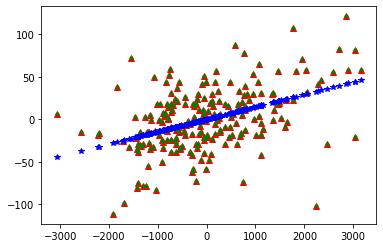

In [89]:
# Exp- 13.* Manual approach to calculate univariate linear regression Doesn't required for experiment .
# its dummy
X = CleandataFrame.ApplicantIncome
Y = CleandataFrame.LoanAmount
miuX = np.mean(X)
newX = X-miuX
miuY = np.mean(Y)
newY = Y-miuY
k = newX.T @ newX
m = ((newX.T@newY)/k)
plt.plot((X-miuX),(Y-miuY),'r^')
# plt.pause(0.0000000001)
plt.plot(newX,newY,'g.')
# plt.pause(0.0000000001)
plt.plot((X-miuX),m*(X-miuX),'b*')
plt.show()

MAE     : 32.17696
MSE     : 1743.84724
RMSE    : 41.75940
RAE     : 1.12315
RSE     : 1.27203
R2_Score: -0.27203


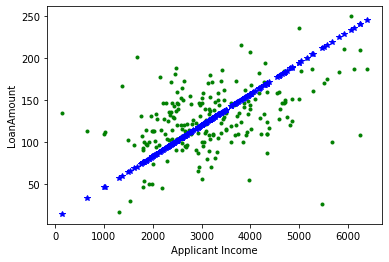

In [90]:
CleandataFrame
X = CleandataFrame.ApplicantIncome
Y = CleandataFrame.LoanAmount
miuX = np.mean(X)
miuY = np.mean(Y)
k = (X.T @ X)
ThetaOne = (X.T@Y)/k
ThetaZero = miuY - miuX*ThetaOne
Y_hat = ThetaOne*X + ThetaZero
plt.plot(X,Y,'g.')
plt.plot(X,Y_hat,'b*')
plt.xlabel("Applicant Income")
plt.ylabel("LoanAmount")
MAE = np.mean(np.fabs(Y-Y_hat))                          
MSE = np.mean((Y-Y_hat)**2)                              
RMSE = np.sqrt(MSE)                                      
RAE = np.sum(np.fabs(Y-Y_hat)) / np.sum(np.fabs(Y-miuY)) 
RSE = np.sum((Y-Y_hat)**2) / np.sum((Y-miuY)**2)         
R2_score = 1-RSE                                         
print("MAE     : %0.5f" %MAE)                       # Mean Absolute Error
print("MSE     : %0.5f" %MSE)                       # Mean Squared Error
print("RMSE    : %0.5f" %RMSE)                      # Root Mean Squared Error
print("RAE     : %0.5f" %RAE)                       # Relative Absolute Error
print("RSE     : %0.5f" %RSE)                       # Relative Squared Error
print("R2_Score: %0.5f" %R2_score)                  # R2_score ( it represents hot close the data values are to the
                                                    # fitted regression line. The higher the R2 the better the model)
plt.show()

Predicted shape:  (216, 1)
MAE     : 26.25033
MSE     : 1181.39075
RMSE    : 34.37137
RAE     : 0.91628
RSE     : 0.86175
R2_Score: 0.13825


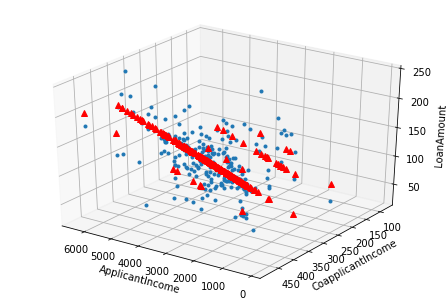

Note: This figure should be 3D but in notebook it is showing only 2D projection of the 3D plot
You can visualize it in python interperter directly source file containing *.py extention :)
Just copy the code and save it in .py file extension and run it. don't forgot to copy required libraries
and loading datafile also


In [91]:
# Exp-14 Build multiple Linear Regression machine learning model using
# 'LoanAmount', ‘ApplicantIncome' columns of Loan_training dataset.
# Calculate the following values on Loan_testing dataset
# i. Mean Absolute Error
# ii. Mean Squared Error
# iii. Root Mean Squared Error
# Multivariate Linear regression
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X1 = np.asarray(CleandataFrame.ApplicantIncome)
X2 = np.asarray(CleandataFrame.Loan_Amount_Term)
Idx = X1.argsort()
X1 = X1[Idx]
X2 = X2[Idx]

x1 = X1.reshape((len(X1), 1))
x2 = X2.reshape((len(X2), 1))
Y = np.asarray(CleandataFrame.LoanAmount)
Y = Y[Idx]
y = Y.reshape((len(Y),1))
X = np.append(x1,x2,axis=1)
miuX = np.mean(X, axis=0)
miuY = np.mean(y, axis=0)
ThetaOne = np.linalg.inv(X.T @ X)@X.T@y
ThetaZero = miuY - miuX @ ThetaOne
# print(ThetaZero.shape)
# print(ThetaOne.shape)
def predict(x):
    y_hat = ThetaZero + x @ ThetaOne
    print("Predicted shape: ",y_hat.shape)
    return y_hat[:,0]

ax.plot(X1, X2, Y,'.')
Y_hat = predict(X)
ax.plot(X1, X2, Y_hat,'r^')
ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('CoapplicantIncome')
ax.set_zlabel('LoanAmount')
ax.view_init(elev=30,azim=125)
MAE = np.mean(np.fabs(Y-Y_hat))                          
MSE = np.mean((Y-Y_hat)**2)                              
RMSE = np.sqrt(MSE)                                      
RAE = np.sum(np.fabs(Y-Y_hat)) / np.sum(np.fabs(Y-miuY)) 
RSE = np.sum((Y-Y_hat)**2) / np.sum((Y-miuY)**2)         
R2_score = 1-RSE
print("MAE     : %0.5f" %MAE)                            # Mean Absolute Error
print("MSE     : %0.5f" %MSE)                            # Mean Squared Error
print("RMSE    : %0.5f" %RMSE)                           # Root Mean Squared Error
print("RAE     : %0.5f" %RAE)                            # Relative Absolute Error
print("RSE     : %0.5f" %RSE)                            # Relative Squared Error
print("R2_Score: %0.5f" %R2_score)                       # R2_score (it represents hot close the data values are to the
                                                         #           fitted regression line. The higher the R2 the
                                                         #           better the model)
plt.show()
print("Note: This figure should be 3D but in notebook it is showing only 2D projection of the 3D plot")
print("You can visualize it in python interperter directly source file containing *.py extention :)")
print("Just copy the code and save it in .py file extension and run it. don't forgot to copy required libraries");
print("and loading datafile also");